# Lab 2: Using Pandas for data analysis

### **Purpose** : learn the main functions of Pandas for data analysis.

1. Download ***NationalNames.csv*** file, a dataset of U.S. baby names from the site Kaggle.com  
   **link:** https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv
3. **Complete the exercises for the options. To calculate the option number 
use the formula**  
   N = (n + 4 ) % 5 + 1,  
   where N is the option number, n is the number in the group list.

In [1]:
n = 6
N = (n + 4) % 5 + 1
print(f"Zharyi Vadym. Variant: {N}")

Zharyi Vadym. Variant: 1


#### List of exercises for Variant 1:

| Variant| Exercise numbers                                                   |
|:-------|:-------------------------------------------------------------------|
| 1      | 1, 2, 3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 26 |

⬇️Import data for further processing⬇️

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file_path = "NationalNames.csv"
df = pd.read_csv(file_path)
df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


## **Task 1**
### Print the first 8 lines of the data set

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## **Task 2**
### Print the last 8 lines of the data set

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## **Task 3**
### Get the column names of the data set

In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

## **Task 5**
### Find the number of unique names in the data set

In [6]:
df['Name'].nunique()

93889

## **Task 10**
### Count the number of unique names in each year

In [7]:
df.groupby('Year').agg({'Name' : 'nunique'})

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


## **Task 11**
### Find the year with the most unique names

In [8]:
df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name')


,Name
Year,
2008,32488


## **Task 12**
### Find the most popular name in the year with the most unique names (i.e. in 2008)

In [9]:
year_with_most_unique_names = df.groupby('Year').agg({'Name' : 'nunique'}).nlargest(1, 'Name').index[0]
df[df['Year'] == year_with_most_unique_names].groupby('Name').agg({'Count': 'sum'}).nlargest(1, 'Count').index[0]

'Jacob'

## **Task 13**
### Find the year when the name Jacob was the most popular for female's name

In [68]:
df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')].nlargest(1, 'Count')


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


## **Task 14**
### Find the year with the highest number of gender neutral names (same male and female names)

In [40]:
gender_neutral = df.groupby(['Year', 'Name']).agg({'Gender': 'nunique'})
gender_neutral = gender_neutral[gender_neutral['Gender'] > 1]
gender_neutral_per_year = gender_neutral.groupby('Year').size()
year_with_most_gender_neutral_names = gender_neutral_per_year.idxmax()
max_gender_neutral_count = gender_neutral_per_year.max()
result_table = pd.DataFrame({
    'Year': [year_with_most_gender_neutral_names],
    'Gender_neutral_names': [max_gender_neutral_count]
})

result_table.set_index('Year')


,Gender_neutral_names
Year,
2008,2557


## **Task 15**
### Find the total number of births in a year

In [43]:
df.groupby('Year').agg({'Count':'sum'}).head()

,Count
Year,
1880,201484
1881,192699
1882,221538
1883,216950
1884,243467


## **Task 16**
### Find the year when the most children were born

In [49]:
df.groupby('Year').agg({'Count': 'sum'}).idxmax().item()

1957

## **Task 17**
### Find the number of girls and boys born each year

In [54]:
df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum').head()

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


## **Task 18**
### Count the number of years when girls were born more than than boys

In [65]:
births_by_gender = df.pivot_table(index='Year', columns='Gender', values='Count', aggfunc='sum')
years_with_more_girls = (births_by_gender['F'] > births_by_gender['M']).sum()
years_with_more_girls.item()

54

## **Task 21**
### Count how many times the boys were called Barbara

In [116]:
df[(df['Name'] == 'Barbara') & (df['Gender'] == 'M')]['Count'].sum().item()


4139

## **Task 22**
### Count how many times the boys were called Barbara

In [75]:
f"Observation was conducted for {df['Year'].nunique()} years"

'Observation was conducted for 135 years'

## **Task 23**
### Know the most popular gender-neutral names (those that are present every year)

In [89]:
gender_counts_per_year_name = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral = gender_neutral[gender_neutral['Gender'] > 1]
names_present_in_all_years = gender_neutral.groupby('Name').size()
always_gender_neutral_names = names_present_in_all_years[names_present_in_all_years == df['Year'].nunique()]
result_table = df[df['Name'].isin(always_gender_neutral_names.index)].groupby('Name')['Count'].sum().sort_values(ascending=False).reset_index()
result_table = result_table[['Name']]
result_table

,Name
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


## **Task 24**
### Find the most popular among unpopular names (unpopular name, which was used to name children the most number of times)

In [112]:
unpopular_names = df[df['Count'] == 5]
most_popular_unpopular_name = unpopular_names.groupby('Name').agg({'Count': 'sum'}).nlargest(1, 'Count')
f'The most popular of the unpopular names is {most_popular_unpopular_name.index[0]}. This name has been called {most_popular_unpopular_name['Count'].values[0]} times'

'The most popular of the unpopular names is Celester. This name has been called 160 times'

## **Task 26**
### Draw graphs of the number of female names John and male names Mary by year.

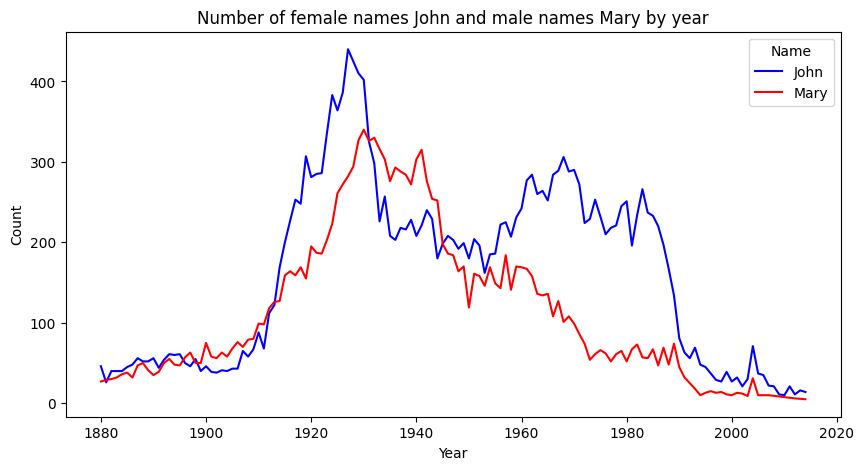

In [142]:
john_counts = df[(df['Name'] == 'John') & (df['Gender'] == 'F')]
mary_counts = df[(df['Name'] == 'Mary') & (df['Gender'] == 'M')]

john_by_year_counts = john_counts.groupby('Year')['Count'].sum()
mary_by_year_counts = mary_counts.groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 5), dpi=100)

plt.plot(john_by_year_counts.index, john_by_year_counts.values, color='blue', label='John')
plt.plot(mary_by_year_counts.index, mary_by_year_counts.values, color='red', label='Mary')

plt.title("Number of female names John and male names Mary by year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Name')

plt.show()